In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [3]:
def f(x):
    return x

### Try a basic widget

In [4]:
interact(f, x=0)

interactive(children=(IntSlider(value=0, description='x', max=1), Output()), _dom_classes=('widget-interact',)…

<function __main__.f(x)>

### Now let's try a widget with an argument 

In [5]:
def interact_with(obj, x):
    print(obj)
    interact(f, x=x)

In [6]:
interact_with('a', x=10)

a


interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

### Now a widget where the called function actually uses the argument

In [7]:
def g(dat, x):
    print(f"dat={dat} from inside g")
    return dat

In [8]:
interact(g, dat=fixed('a'), x=10)

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.g(dat, x)>

### Now with a DataArray as the argument

In [9]:
ds = xr.tutorial.open_dataset('air_temperature')
da = ds['air']
ds
type(ds.coords['lat'].indexes)

xarray.core.indexes.Indexes

In [10]:
all_times = list(str(val) for val in da.coords['time'].values)

In [11]:
def sel_then_plot(da, time):
    da_slice = da.sel(time=time)
    return da_slice.plot()

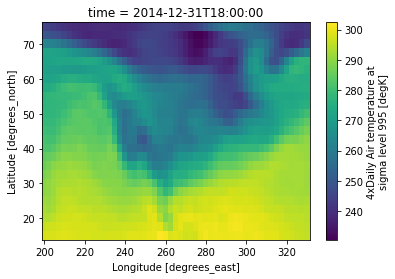

In [12]:
sel_then_plot(da, time='2014-12-31T18:00:00')

In [13]:
interact(sel_then_plot, da=fixed(da), time=all_times)

interactive(children=(Dropdown(description='time', options=('2013-01-01T00:00:00.000000000', '2013-01-01T06:00…

<function __main__.sel_then_plot(da, time)>

### Slider instead of dropdown

In [52]:
def isel_then_plot(da, time):
    da_slice = da.isel(time=time)
    return da_slice.plot()

In [20]:
interact(isel_then_plot, da=fixed(da), time=10)

interactive(children=(IntSlider(value=10, description='time', max=30, min=-10), Output()), _dom_classes=('widg…

<function __main__.isel_then_plot(da, time)>

### Set fixed arguments with closures instead

In [60]:
def interactive_plot(da, time):
    
    @interact(time=time)
    def _plot_with_da(time):
        return isel_then_plot(da, time)
  
interactive_plot(da, time=10)

interactive(children=(IntSlider(value=10, description='time', max=30, min=-10), Output()), _dom_classes=('widg…

In [61]:
def interactive_plot(da, time):
    
    def _plot_with_da(time):
        return isel_then_plot(da, time)
    
    widgets = interact(_plot_with_da, time=time)

interactive_plot(da, time=10)

interactive(children=(IntSlider(value=10, description='time', max=30, min=-10), Output()), _dom_classes=('widg…

### Custom slider

In [27]:
def interactive_plot(da, time):
    
    def _plot_with_da(time):
        return isel_then_plot(da, time)
    
    widgets = interact(_plot_with_da, time=time, continuous_update=False)

time_slider = widgets.IntSlider(value=10, min=0, max=da.sizes['time'], step=1, continuous_update=False)
interactive_plot(da, time=time_slider)

interactive(children=(IntSlider(value=10, continuous_update=False, description='time', max=2920), Output()), _…

### Multiple widgets

In [23]:
import pandas as pd

In [38]:
# Make some example 4D data

t = da.isel(time=slice(0, 365 * 4, 250))

t4d = xr.concat([t, t + 40], pd.Index(['normal', 'hot'], name='scenario'))

# This is a 4d array
t4d.coords
t4d

<xarray.DataArray 'air' (scenario: 2, time: 6, lat: 25, lon: 53)>
array([[[[241.2    , 242.5    , 243.5    , ..., 232.79999, 235.5    ,
          238.59999],
         [243.79999, 244.5    , 244.7    , ..., 232.79999, 235.29999,
          239.29999],
         [250.     , 249.79999, 248.89   , ..., 233.2    , 236.39   ,
          241.7    ],
         ...,
         [296.6    , 296.19998, 296.4    , ..., 295.4    , 295.1    ,
          294.69998],
         [295.9    , 296.19998, 296.79   , ..., 295.9    , 295.9    ,
          295.19998],
         [296.29   , 296.79   , 297.1    , ..., 296.9    , 296.79   ,
          296.6    ]],

        [[241.79999, 240.7    , 239.5    , ..., 231.     , 233.39   ,
          235.89   ],
         [245.59999, 244.     , 242.39   , ..., 230.5    , 232.7    ,
          235.5    ],
         [256.3    , 254.5    , 252.5    , ..., 227.5    , 230.59999,
          235.5    ],
         ...,
         [295.     , 294.1    , 293.6    , ..., 296.19998, 295.9    ,
          295.29   ],
         [295.69998, 295.5    , 295.     , ..., 295.69998, 295.19998,
          294.9    ],
         [296.1    , 296.1    , 296.19998, ..., 295.6    , 295.19998,
          295.19998]],

        [[260.4    , 260.1    , 260.19998, ..., 250.29999, 250.79999,
          251.7    ],
         [260.9    , 260.29   , 260.     , ..., 248.2    , 249.29999,
          251.39   ],
         [264.6    , 263.4    , 262.29   , ..., 248.79999, 251.2    ,
          254.7    ],
         ...,
         [297.6    , 297.5    , 297.4    , ..., 296.6    , 296.4    ,
          295.6    ],
         [298.19998, 298.5    , 298.4    , ..., 296.9    , 296.69998,
          296.1    ],
         [298.29   , 298.69998, 298.6    , ..., 297.4    , 297.4    ,
          297.29   ]],

        [[276.     , 275.5    , 275.1    , ..., 268.19998, 269.79   ,
          271.5    ],
         [276.5    , 276.4    , 276.19998, ..., 267.79   , 270.4    ,
          273.29   ],
         [280.     , 280.19998, 280.19998, ..., 268.6    , 271.4    ,
          274.29   ],
         ...,
         [297.9    , 296.9    , 296.4    , ..., 298.29   , 297.4    ,
          296.79   ],
         [298.19998, 297.69998, 297.19998, ..., 298.1    , 297.79   ,
          297.6    ],
         [299.     , 298.69998, 298.19998, ..., 298.5    , 298.5    ,
          298.4    ]],

        [[271.5    , 271.4    , 271.29   , ..., 255.2    , 256.5    ,
          258.69998],
         [275.4    , 275.     , 274.4    , ..., 254.09999, 256.69998,
          260.69998],
         [277.79   , 277.69998, 277.4    , ..., 260.6    , 263.79   ,
          268.     ],
         ...,
         [298.79   , 298.69998, 298.69998, ..., 299.19998, 298.9    ,
          298.6    ],
         [299.5    , 299.29   , 299.     , ..., 299.9    , 299.69998,
          299.5    ],
         [299.6    , 299.5    , 299.19998, ..., 299.79   , 300.19998,
          300.4    ]],

        [[260.29   , 258.79   , 257.1    , ..., 240.5    , 242.59999,
          244.79999],
         [269.1    , 268.19998, 266.4    , ..., 236.     , 237.7    ,
          240.79999],
         [270.9    , 269.79   , 268.5    , ..., 231.5    , 234.5    ,
          240.2    ],
         ...,
         [297.5    , 296.6    , 296.5    , ..., 299.     , 298.     ,
          297.69998],
         [298.19998, 297.79   , 297.4    , ..., 299.19998, 299.     ,
          298.69998],
         [298.29   , 298.1    , 298.1    , ..., 299.69998, 299.5    ,
          299.6    ]]],


       [[[281.2    , 282.5    , 283.5    , ..., 272.8    , 275.5    ,
          278.59998],
         [283.8    , 284.5    , 284.7    , ..., 272.8    , 275.3    ,
          279.3    ],
         [290.     , 289.8    , 288.89   , ..., 273.2    , 276.39   ,
          281.7    ],
         ...,
         [336.6    , 336.19998, 336.4    , ..., 335.4    , 335.1    ,
          334.69998],
         [335.9    , 336.19998, 336.79   , ..., 335.9    , 335.9    ,
          335.19998],
         [336.29   , 336.79   , 337.1    , ..., 33

In [46]:
def sel_then_plot(da, **indexer_kwargs):
    da_slice = da.sel(**indexer_kwargs)
    return da_slice.plot()

In [49]:
def interactive_plot(da, **indexer_kwargs):
    
    def _plot_with_da(**indexer_kwargs):
        return sel_then_plot(da, **indexer_kwargs)
    
    w = interact(_plot_with_da, **indexer_kwargs) #, continuous_update=False)

scenario_dropdown = widgets.Dropdown(options=list(t4d.coords['scenario'].values), value='normal',
                                     description='Scenario:')
interactive_plot(t4d, time=all_times, scenario=scenario_dropdown)

interactive(children=(Dropdown(description='time', options=('2013-01-01T00:00:00.000000000', '2013-01-01T06:00…

### Play animation

In [59]:
def interactive_player(da, time):
    
    def _plot_with_da(time):
        return isel_then_plot(da, time)
    
    
    slider = widgets.IntSlider()
    widgets.jslink((time_player, 'value'), (slider, 'value'))
    widgets.HBox([time_player, slider])
    w = interact(_plot_with_da, time=time)
    

time_player = widgets.Play(
    value=10,
    min=0,
    max=da.sizes['time'],
    step=1,
    interval=500,
    description="Press play",
)

interactive_plot(da, time=time_player)

interactive(children=(Play(value=10, description='Press play', interval=500, max=2920), Output()), _dom_classe…

### Execute something after interact function

In [14]:
interact(sel_then_plot, da=fixed(da), time=all_times)

print("Further analysis which depends on interaction")

interactive(children=(Dropdown(description='time', options=('2013-01-01T00:00:00.000000000', '2013-01-01T06:00…

Further analysis which depends on interaction


In [15]:
def sel_then_plot_and_set_time(da, time):
    da_slice = da.sel(time=time, method='nearest')
    da.attrs['time'] = time
    return da_slice.plot()

In [16]:
da.attrs['time'] = 'default'

interact(sel_then_plot_and_set_time, da=fixed(da), time=all_times)

print(da.attrs['time'])

interactive(children=(Dropdown(description='time', options=('2013-01-01T00:00:00.000000000', '2013-01-01T06:00…

2013-01-01T00:00:00.000000000


It doesn't update, hmmmmm. Will need to try capturing the output then

### Return interactive selection from function

In [82]:
def interactive_isel(da, time):
    
    def _isel_with_da(time):
        return da.isel(time=time)
    
    return interactive(_isel_with_da, time=time)

interactive(children=(IntSlider(value=10, description='time', max=30, min=-10), Output()), _dom_classes=('widg…

<xarray.DataArray 'air' (lat: 25, lon: 53)>
array([[242.59999, 243.     , 243.39   , ..., 239.89   , 242.2    , 244.7    ],
       [244.39   , 245.59999, 246.39   , ..., 236.89   , 238.39   , 241.09999],
       [252.7    , 253.59999, 253.7    , ..., 240.     , 242.09999, 245.39   ],
       ...,
       [296.29   , 295.6    , 295.4    , ..., 295.4    , 294.4    , 293.9    ],
       [297.19998, 296.69998, 296.1    , ..., 295.79   , 295.6    , 295.29   ],
       [297.69998, 297.29   , 297.19998, ..., 297.19998, 297.19998, 297.5    ]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
    time     datetime64[ns] 2013-01-03T12:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC

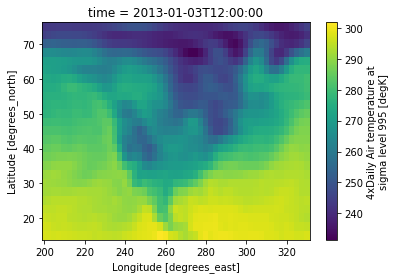

In [86]:
w = interactive_isel(da, time=10)
display(w)
print(w.result)
w.result.plot()

In [98]:
from ipywidgets import interactive

# Define any function
def f(a, b):
    return a + b

# Create sliders using interactive
w = interactive(f, a=(1,5), b=(6,10))

# You can also view this in a notebook without using display.
display(w)
print(w.result)

interactive(children=(IntSlider(value=3, description='a', max=5, min=1), IntSlider(value=8, description='b', m…

11


In [100]:
w.result

9

In [93]:
# This will fail with AttributeError: 'function' object has no attribute 'plot'
#interact(sel, da=fixed(da), time=all_times).plot()